<small><b>CCBY:</b> Un notebook d'Oriol Pujol.</small>

# Una de romans: el coneixement independent de l'observador (aka tirant de notebook com qui no vol la cosa)

<img src = "SPQR-Legionario.jpeg" width=40%>

Imaginem el següent cas:

No tenim clar si els romans han estat a la peninsula i vull construir coneixement al respecte. A tal efecte consideraré les evidències a favor i evidències en contra. 

Per exemple:

    - Llibre grec que diu que els romans no han anat mai. 
    - Jaciment "romà" que després de treballar-hi comprovem que només hi ha elements romans però que és grec. 
    - Un jaciment Romà on trobem una sepultura d'un emperador degudament acreditada.
    - ...

La meva pregunta és: Fins a quin punt han estat els romans a la peninsula ibèrica?. 

<div class = "alert alert-warning" style ="border-radius:10px">A efectes d'aquest notebook faré servir el següent model, que entenem que no és conegut i que ens indica el suport de les evidencies cap a cadascuna de les posicions: Sí hi han estat (1) o No hi han estat (0).
    <p>
$m\sim \mathbb{B}e(p = 0.7)$

</div>

In [44]:
import numpy as np
import matplotlib.pyplot as plt

Imaginem que hem trobat dues evidències: 

In [45]:
np.random.seed(11)
toss=np.random.binomial(1,0.7,size=2)

<BarContainer object of 2 artists>

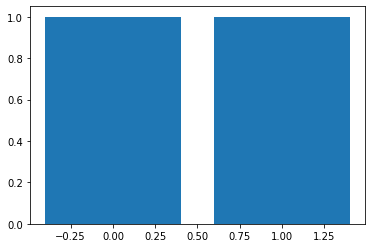

In [46]:
plt.bar(np.arange(len(toss)),toss)

Resulta que les dues evidències donen suport a la presència romana a la peninsula. Però, amb dues evidències

+ fins a quin punt puc creure que realment han estat? 
+ A més, depén la conclusió del que jo penso que va passar?

Per fer-ho necessitem tenir un cert nivell de creencia en aquesta moneda. Podria imaginar que sembre treu cara, o que sempre creu, o que qualsevol resultat es possible, o que hi ha alguns que crec que son millors.

<div class = "alert alert-success" style ="border-radius:10px">Observeu que aquesta creença inicial o coneixement 
<em>a priori </em> és independent del que observem i és introspectiu. I puc creure el que vulgui. Millor si esta suportat per alguna justificació.
</div>

Anem a suposar que estic obert a qualsevol opció i que crec que el grau de penetració dels romans a la peninsula pot ser qualsevol valor.

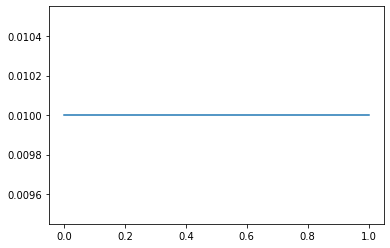

In [48]:
N=100
p = np.linspace(0,1,N)

belief = np.ones((N,1))
belief = belief/np.sum(belief)
plt.plot(p,belief)

Recordem la regla de Bayes per ajustar la nostra creença a partir d'una evidencia:


$$P(C|E) = \frac{P(E|C)P(C)}{P(E)}= \underset{\text{Modificador}}{\underbrace{\frac{P(E|C)}{P(E)}}}\;\underset{\text{Creença}}{\underbrace{P(C)}}$$

Com modifiquem la creença? Faré servir una distribució conjugada (el resultat sera un altre cop una binomial/Bernoulli en el nostre cas).

En el cas que tinguem evidencies positives (1) tindrem el següent modificador:

Text(0.5, 1.0, 'No Romans')

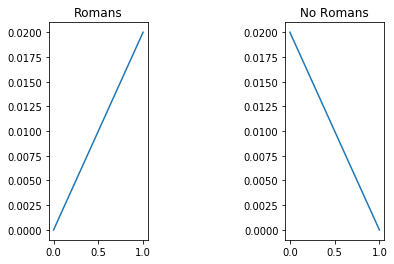

In [50]:
N=100
p = np.linspace(0,1,N)

cara = p[:,np.newaxis]*np.ones((N,1))
cara = cara/np.sum(cara,axis=0)
creu = (1-p[:,np.newaxis])*np.ones((N,1))
creu = creu/np.sum(creu,axis=0)
plt.subplot(1,3,1)
plt.plot(p,cara)
plt.title('Romans')
plt.subplot(1,3,3)
plt.plot(p,creu)
plt.title('No Romans')

Si apliquem aquest mètode a les nostres observacions canvia la nostra creença despres de cada observació.

In [51]:
for t in toss:
    if t>0:
        belief = belief*cara
    else:
        belief = belief*creu
    belief = belief/np.sum(belief,axis=0)

Anem a veure com ha canviat la meva creença:

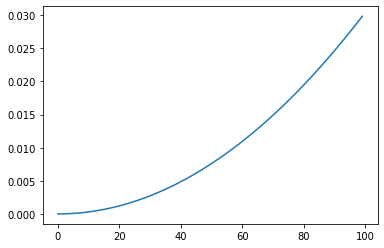

In [52]:
plt.plot(belief)

Però a mesura que anem trobant troballes podem anar actualitzant la nostra creença sobre la presència romana a la península. Imaginem ara que hem trobat 1000 evidències.

Text(0.5, 1.0, 'Creença inicial')

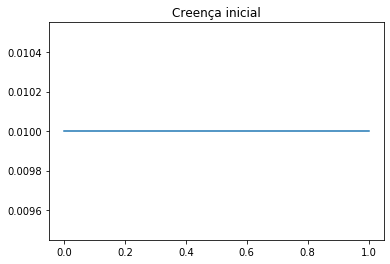

In [53]:
toss=np.random.binomial(1,0.7,size=1000)

N=100
p = np.linspace(0,1,N)

belief = np.ones((N,1))
belief = belief/np.sum(belief)
plt.plot(p,belief)
plt.title('Creença inicial')


Text(0.5, 1.0, 'Creença final')

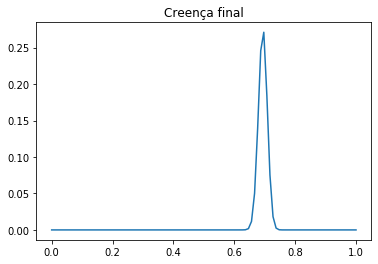

In [54]:
for t in toss:
    if t>0:
        belief = belief*cara
    else:
        belief = belief*creu
    belief = belief/np.sum(belief,axis=0)

plt.plot(p,belief)
plt.title('Creença final')

# El cas de l'esceptic 

Com que soc un HATER vaig a intentar desmuntar aquest sistema. Jo crec que fermament que els romans mai han estat a la penínisula. Només per fastiguejar-nos. 

A excepció que sigui un imposibilista (negacionista extrem) assignaré una creença negligible a la resta pero més gran a zero.

Creença en la resta:  [1.e-20]


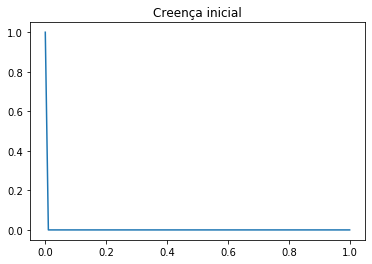

In [55]:
N=100
p = np.linspace(0,1,N)

belief = 1e-20*np.ones((N,1))
belief[0] = 1
belief = belief/np.sum(belief)
plt.plot(p,belief)
plt.title('Creença inicial')
print('Creença en la resta: ',belief[3])

Anem a repetir l'experiment

Text(0.5, 1.0, 'Creença final')

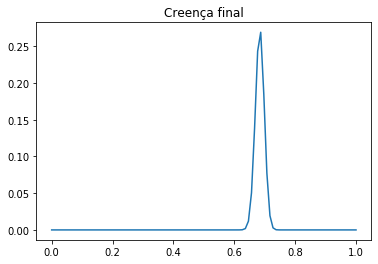

In [56]:
toss=np.random.binomial(1,0.7,size=1000)
for t in toss:
    if t>0:
        belief = belief*cara
    else:
        belief = belief*creu
    belief = belief/np.sum(belief,axis=0)

plt.plot(p,belief)
plt.title('Creença final')

Pots ser un HATER però el sistema funciona!!!!!

De fet la nostra creença inicial és irrellevant donades suficients evidències. 